In [1]:
!pip install xgboost

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

### Reading Dataset

In [3]:
data=pd.read_csv('adult.csv')
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K



The Adult Census dataset, commonly referred to as the "Adult" dataset, is a well-known dataset used for classification tasks, particularly for predicting whether an individual earns more than $50,000 per year. It contains various demographic and socioeconomic features of individuals such as age, education, occupation, marital status, race, gender, and more. The dataset was extracted from the 1994 Census database and has been frequently used for research in machine learning and data mining.

The problem associated with the Adult Census dataset is to build a predictive model that can accurately classify individuals into one of two income classes: those earning more than $50,000 per year (often labeled as ">50K") and those earning less than or equal to 50,000 per year ( often labeled as "<=50K" ). This is a binary classification problem.

The main goal of this problem is to leverage the available demographic and socioeconomic features to predict an individual's income level. This predictive modeling task has various real-world applications, including targeted marketing, credit risk assessment, social policy planning, and more.

### Information about the dataset

The Adult Census dataset comprises 15 columns, with 9 columns classified as 'object' representing categorical variables such as education level, occupation, marital status, race, gender, native country, etc. The remaining 6 columns are either integer or float data types, indicating numerical variables like age, education years, capital gains, capital losses, hours per week worked, etc.

This dataset is notably free of missing values, streamlining analysis and modeling tasks without the need for imputation or handling missing data.

In classification tasks, one of the categorical columns typically serves as the target variable, such as income levels categorized as ">50K" or "<=50K".

The dataset is frequently utilized for predictive modeling, particularly for forecasting income levels based on demographic and socioeconomic features. Each row likely represents an individual in the census data, with columns detailing specific attributes or characteristics.

In [4]:
data.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## EDA

Exploratory Data Analysis (EDA) involves analyzing various features of the dataset to gain insights into its characteristics and distributions. This process includes examining feature distributions through histograms, kernel density estimates (KDE), or boxplots to visualize spread and central tendency, assessing dataset balance for classification tasks, exploring correlations between features to detect multicollinearity, confirming absence of missing values across features, identifying potential outliers using visualizations like boxplots or scatter plots, exploring feature relationships through scatter plots or pair plots, computing summary statistics for numerical features to understand central tendency and dispersion, and potentially applying data transformation techniques such as normalization or standardization to ensure consistent feature scales. EDA aids in understanding the dataset's structure, identifying preprocessing needs, and informing modeling decisions based on a comprehensive understanding of the data.

Text(0.5, 0, 'Age')

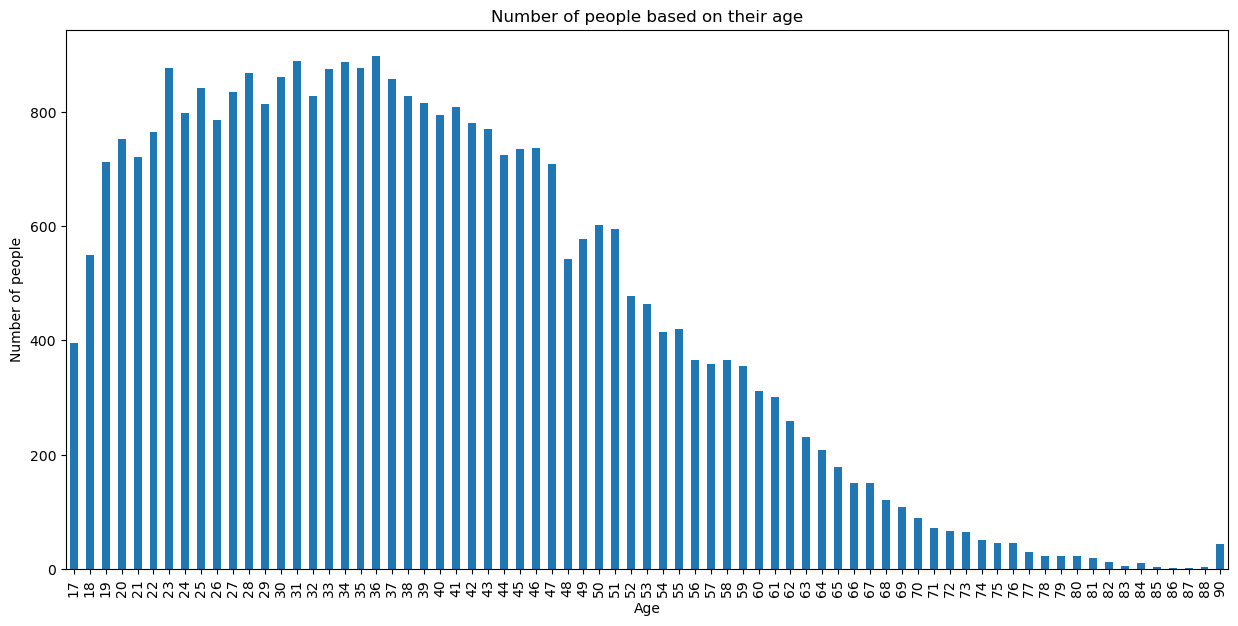

In [6]:
data['age'].value_counts().sort_index().plot(kind='bar',figsize=(15,7))
plt.title('Number of people based on their age')
plt.ylabel('Number of people')
plt.xlabel('Age')

C:\Users\samir\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution over Age')

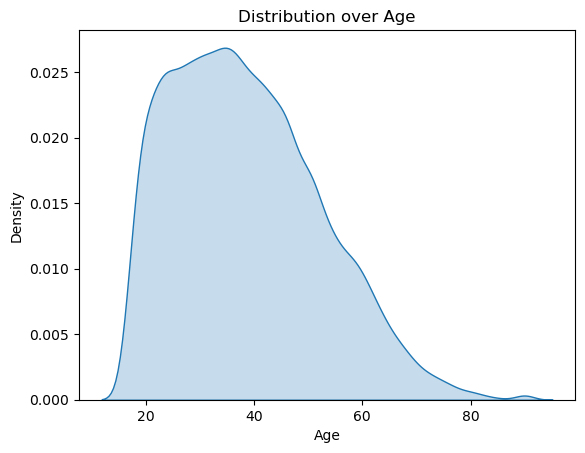

In [7]:
sns.kdeplot(data['age'],fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution over Age')

Text(0.5, 0, 'Gender')

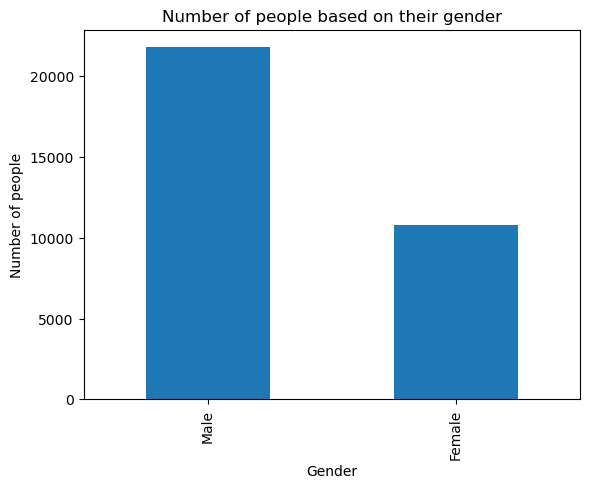

In [8]:
data['sex'].value_counts().plot(kind='bar')
plt.title('Number of people based on their gender')
plt.ylabel('Number of people')
plt.xlabel('Gender')

<Figure size 1500x700 with 0 Axes>

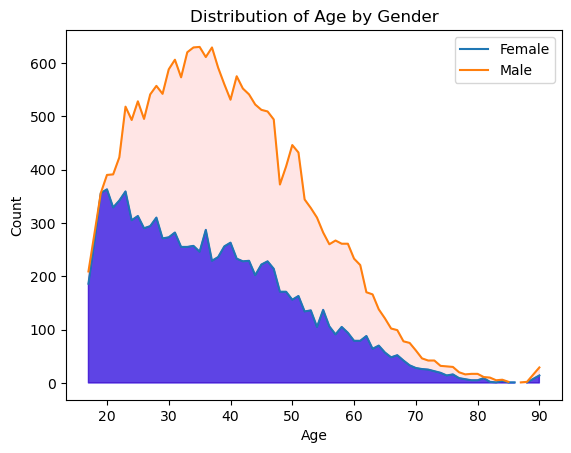

In [9]:
combined_data = data.groupby(['age', 'sex']).size().unstack()
plt.figure(figsize=(15, 7))
combined_data.plot()
plt.fill_between(combined_data.index, combined_data['Female'], color='blue', alpha=0.7)
plt.fill_between(combined_data.index, combined_data['Male'], color='red', alpha=0.1)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Gender')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Number of people over marital status')

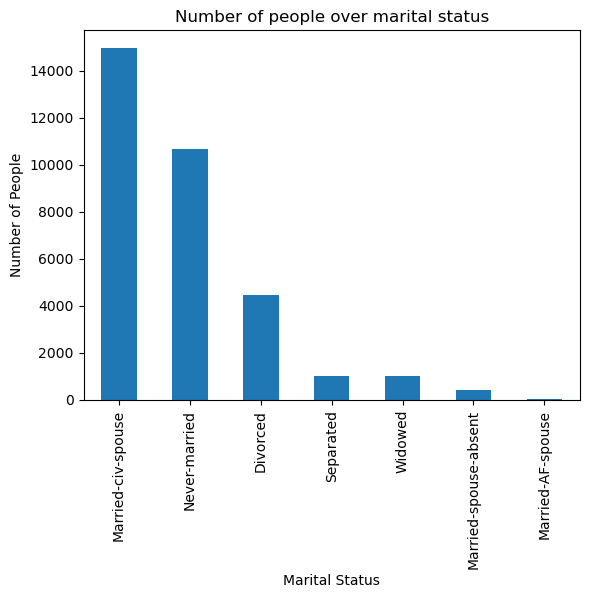

In [10]:
data['marital.status'].value_counts().plot(kind='bar')
plt.ylabel('Number of People')
plt.xlabel('Marital Status')
plt.title('Number of people over marital status')

Text(0.5, 1.0, 'Number of people over Relationship')

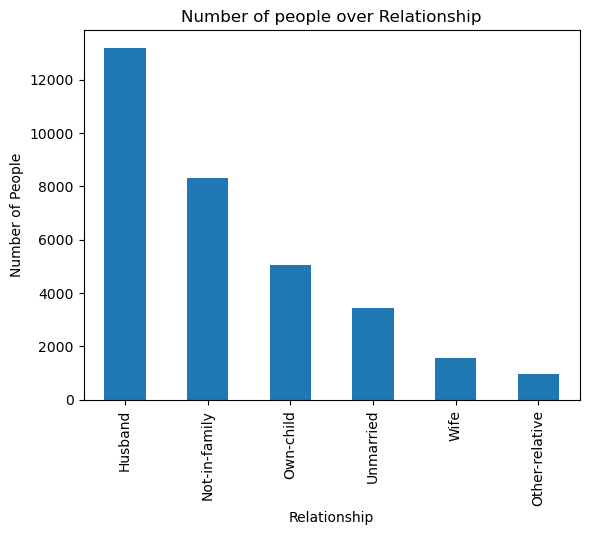

In [11]:
data['relationship'].value_counts().plot(kind='bar')
plt.ylabel('Number of People')
plt.xlabel('Relationship')
plt.title('Number of people over Relationship')

Text(0.5, 1.0, 'Number of People based their occupation')

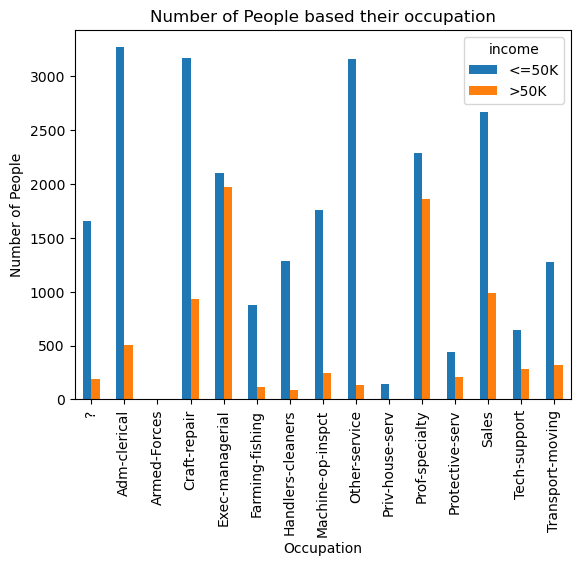

In [12]:
combined_data = data.groupby(['occupation', 'income']).size().unstack()
combined_data.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Number of People')
plt.title('Number of People based their occupation')
#There is ? is occupation field most probably dataset is encoded nan values as '?' mark

## Data Cleaning and Preparation
In the Adult Census dataset, the presence of '?' marks indicates missing values that are not represented as standard NaN values but rather as a specific placeholder. This is a common issue encountered in real-world datasets, where missing values may be encoded differently or represented in non-standard formats. So it should be cleaned

In [13]:
question_marked_columns=data.columns[data.eq('?').any()]
question_marked_columns
#This columns has '?' marks

Index(['workclass', 'occupation', 'native.country'], dtype='object')

In [14]:
data[data == '?'] = np.nan
data
#Question marks are encoded as np.nan values

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [15]:
data.isnull().any()
#So now the dataset has some nan values

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

In [16]:
for col in question_marked_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)
#Imputing all of the nan values with the mode of the relative features

In [17]:
data.isnull().any()
#Now, the dataset has no any null values 

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

In [18]:
x = data.drop(['income'], axis=1)
y = data['income']
#Splitting dataset to x and y
np.shape(x),np.shape(y)

((32561, 14), (32561,))

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Split x and y to test and train datasets

numerical_cols = [cname for cname in x_train.columns if 
            x_train[cname].dtype in ['int64', 'float64']]

#Get list of numerical cols

categorical_cols = [cname for cname in x_train.columns if
            x_train[cname].dtype == "object"]

#Get list of categorical cols
for feature in categorical_cols:
    le = preprocessing.LabelEncoder()
    x_train[feature] = le.fit_transform(x_train[feature])
    x_test[feature] = le.transform(x_test[feature])
    
#Label encoding of categorical columns

scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

#Standard scaling method to scale all numerical columns after label encoding

# Modelling

## Logistic Regression 
### Hyperparameter Optimization
Some common parameters are seperated for Logistic Regression to find optimal value based on accuracy score

In [20]:
model = LogisticRegression()

#defining model

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga'] 
}

#selected parameters

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

#fitting model

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
logleg_acc = accuracy_score(y_test, y_pred)
#finding accuracy score of the optimal model
print(logleg_acc)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
0.8221926502200839
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


Best parameters are selected over 24 different models with 3 fold for each of them and the accuracy score is  82.22%

## PCA test

In [21]:
pca = PCA()
x_train = pca.fit_transform(x_train)
pca.explained_variance_ratio_

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

With the pca test, the last feature just correlated with 2.74% and it means the rest of the variables, affects 97.5%.
First experiment should be without the last feature.
Second test, should be without last 2 features. The last 2 features affect just the 7%.
And the third test, should be without last 3 features. They affect just 11%

First experiment with Logistic Regression

In [22]:
#The same steps but without native.country feature
x_pca=x.drop('native.country',axis=1)
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size = 0.3, random_state = 0)
np.shape(x_train_pca),np.shape(x_test_pca),np.shape(y_train),np.shape(y_test)
numerical_cols = [cname for cname in x_train_pca.columns if 
            x_train_pca[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in x_train_pca.columns if
            x_train_pca[cname].dtype == "object"]
for feature in categorical_cols:
    le = preprocessing.LabelEncoder()
    x_train_pca[feature] = le.fit_transform(x_train_pca[feature])
    x_test_pca[feature] = le.transform(x_test_pca[feature])
scaler = StandardScaler()
x_train_pca = pd.DataFrame(scaler.fit_transform(x_train_pca), columns = x_pca.columns)
x_test_pca = pd.DataFrame(scaler.transform(x_test_pca), columns = x_pca.columns)

In [23]:
grid_search.fit(x_train_pca, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_pca)
logleg_acc_pca = accuracy_score(y_test, y_pred)
print(logleg_acc_pca)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
0.8216808271061521
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


Second experiment with Logistic Regression

In [24]:
#The same steps but without 3 column
x_pca1=x.drop(['hours.per.week','native.country'],axis=1)
x_train_pca1, x_test_pca1, y_train, y_test = train_test_split(x_pca1, y, test_size = 0.3, random_state = 0)
np.shape(x_train_pca1),np.shape(x_test_pca1),np.shape(y_train),np.shape(y_test)
numerical_cols = [cname for cname in x_train_pca1.columns if 
            x_train_pca1[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in x_train_pca1.columns if
            x_train_pca1[cname].dtype == "object"]
for feature in categorical_cols:
    le = preprocessing.LabelEncoder()
    x_train_pca1[feature] = le.fit_transform(x_train_pca1[feature])
    x_test_pca1[feature] = le.transform(x_test_pca1[feature])
scaler = StandardScaler()
x_train_pca1 = pd.DataFrame(scaler.fit_transform(x_train_pca1), columns = x_pca1.columns)
x_test_pca1 = pd.DataFrame(scaler.transform(x_test_pca1), columns = x_pca1.columns)

In [25]:
grid_search.fit(x_train_pca1, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_pca1)
logleg_acc_pca1 = accuracy_score(y_test, y_pred)
print(logleg_acc_pca1)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
0.8231139318251612
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


Third experiment with Logistic Regression

In [26]:
x_pca2=x.drop(['capital.loss','hours.per.week','native.country'],axis=1)
x_train_pca2, x_test_pca2, y_train, y_test = train_test_split(x_pca2, y, test_size = 0.3, random_state = 0)
np.shape(x_train_pca2),np.shape(x_test_pca2),np.shape(y_train),np.shape(y_test)
numerical_cols = [cname for cname in x_train_pca2.columns if 
            x_train_pca2[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in x_train_pca2.columns if
            x_train_pca2[cname].dtype == "object"]
for feature in categorical_cols:
    le = preprocessing.LabelEncoder()
    x_train_pca2[feature] = le.fit_transform(x_train_pca2[feature])
    x_test_pca2[feature] = le.transform(x_test_pca2[feature])
scaler = StandardScaler()
x_train_pca2 = pd.DataFrame(scaler.fit_transform(x_train_pca2), columns = x_pca2.columns)
x_test_pca2 = pd.DataFrame(scaler.transform(x_test_pca2), columns = x_pca2.columns)

In [27]:
grid_search.fit(x_train_pca2, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_pca2)
logleg_acc_pca2 = accuracy_score(y_test, y_pred)
print(logleg_acc_pca2)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
0.8187122530453476
Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [28]:
#Labelling the results
y_train=pd.get_dummies(y_train,dtype='int')['<=50K']
y_test=pd.get_dummies(y_test,dtype='int')['<=50K']

## XGB

In [29]:
model = XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.0, 0.1, 0.2, 0.3],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0],
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, scoring='accuracy', cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)
xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
0.7431671614290102
Best Parameters: {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.8}


First experiment with XGB

In [30]:
random_search.fit(x_train_pca, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test_pca)
xgb_acc_pca = accuracy_score(y_test, y_pred)
print(xgb_acc_pca)
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
0.8669259903777254
Best Parameters: {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}


Second experiment with XGB

In [31]:
random_search.fit(x_train_pca1, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test_pca1)
xgb_acc_pca1 = accuracy_score(y_test, y_pred)
print(xgb_acc_pca1)
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
0.86539052103593
Best Parameters: {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}


Third experiment with XGB

In [32]:
random_search.fit(x_train_pca2, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test_pca2)
xgb_acc_pca2 = accuracy_score(y_test, y_pred)
print(xgb_acc_pca2)
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
0.8594533729143208
Best Parameters: {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.8}


## Decision Tree

In [33]:
model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 5, 7, 9],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
# Step 5: Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
tree_acc = accuracy_score(y_test, y_pred)
print(tree_acc)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
0.7197256628109325
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}


C:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


First experiment with Decision Tree

In [34]:
grid_search.fit(x_train_pca, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_pca)
tree_acc_pca = accuracy_score(y_test, y_pred)
print(tree_acc_pca)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
0.8481932644078206
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}


Second experiment with Decision Tree

In [35]:
grid_search.fit(x_train_pca1, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_pca1)
tree_acc_pca1 = accuracy_score(y_test, y_pred)
print(tree_acc_pca1)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
0.847169618179957
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}


Third experiment with Decision Tree

In [36]:
grid_search.fit(x_train_pca2, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_pca2)
tree_acc_pca2 = accuracy_score(y_test, y_pred)
print(tree_acc_pca2)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
0.8417442931722796
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


To finalize all of the accuracies, all of models and their accuracies should be collected with dataframe format

In [37]:
model_accuracies=pd.DataFrame({'model_name':['Logistic Regression (without PCA)','Logistic Regression (One feature extracted)','Logistic Regression (Two feature extracted)','Logistic Regression (Three feature extracted)','XGB (without PCA)','XGB (One feature extracted)','XGB (Two feature extracted)','XGB (Three feature extracted)','Decision Tree (without PCA)','Decision Tree (One feature extracted)','Decision Tree (Two feature extracted)','Decision Tree (Three feature extracted)'],'accuracy':[logleg_acc,logleg_acc_pca,logleg_acc_pca1,logleg_acc_pca2,xgb_acc,xgb_acc_pca,xgb_acc_pca1,xgb_acc_pca2,tree_acc,tree_acc_pca,tree_acc_pca1,tree_acc_pca2]})
model_accuracies.sort_values('accuracy',ascending=False)

,model_name,accuracy
5,XGB (One feature extracted),0.866926
6,XGB (Two feature extracted),0.865391
7,XGB (Three feature extracted),0.859453
9,Decision Tree (One feature extracted),0.848193
10,Decision Tree (Two feature extracted),0.847170
11,Decision Tree (Three feature extracted),0.841744
2,Logistic Regression (Two feature extracted),0.823114
0,Logistic Regression (without PCA),0.822193
1,Logistic Regression (One feature extracted),0.821681
3,Logistic Regression (Three feature extracted),0.818712


Text(0.5, 1.0, 'Accuracies of Models')

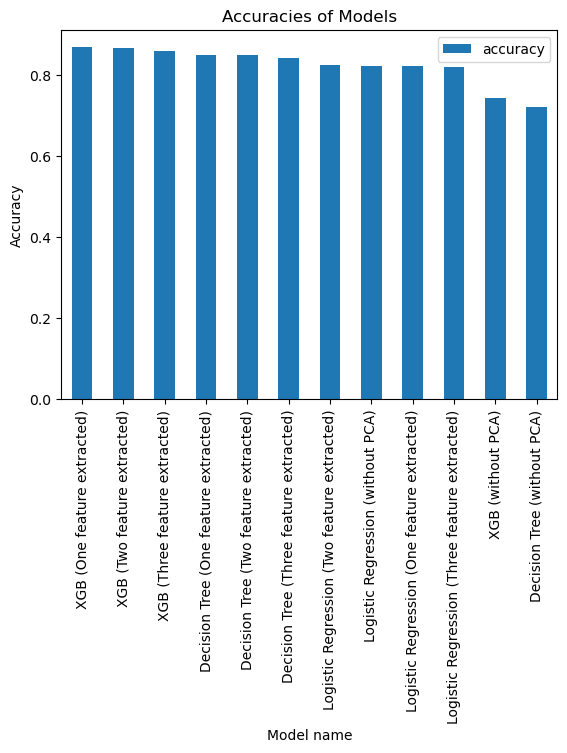

In [38]:
model_accuracies.set_index('model_name').sort_values('accuracy',ascending=False).plot(kind='bar')
plt.xlabel('Model name')
plt.ylabel('Accuracy')
plt.title('Accuracies of Models')